In [ ]:
''' the porpoise of this notebook is to run models locally and avoid training them repeatedly, so to use it: 
1. run every cell of "Total_project_build_and_run_in_1notebook.ipynb"(has been given in this repo) to setup the enviroment
2. last two cell used to download the models, vectorizer and evaluation files
3. so after successfully download the  files you are good to go to run this notebook and use trained models'''

In [1]:
# Load models and vectorizer from local directory
import joblib
import os

svm_linear = joblib.load(r"D:\data science\Sentiment_Analysis_Movie_Reviews_Project\saved_models\svm_linear.pkl")
svm_poly   = joblib.load(r"D:\data science\Sentiment_Analysis_Movie_Reviews_Project\saved_models\svm_poly.pkl")
svm_rbf    = joblib.load(r"D:\data science\Sentiment_Analysis_Movie_Reviews_Project\saved_models\svm_rbf.pkl")
tfidf      = joblib.load(r"D:\data science\Sentiment_Analysis_Movie_Reviews_Project\saved_models\tfidf_vectorizer.pkl")

print("Models loaded successfully!")


Models loaded successfully!


In [2]:
# Load evaluation outputs from local directory
import joblib

y_test        = joblib.load(r"D:\data science\Sentiment_Analysis_Movie_Reviews_Project\saved_models\evaluation\y_test.pkl")
y_pred_linear = joblib.load(r"D:\data science\Sentiment_Analysis_Movie_Reviews_Project\saved_models\evaluation\y_pred_linear.pkl")
y_pred_poly   = joblib.load(r"D:\data science\Sentiment_Analysis_Movie_Reviews_Project\saved_models\evaluation\y_pred_poly.pkl")
y_pred_rbf    = joblib.load(r"D:\data science\Sentiment_Analysis_Movie_Reviews_Project\saved_models\evaluation\y_pred_rbf.pkl")

print("Evaluation outputs loaded successfully!")


Evaluation outputs loaded successfully!


        Model  Accuracy  F1 Score
0      Linear   0.87220  0.871091
1  Polynomial   0.82164  0.825486
2         RBF   0.87888  0.878540


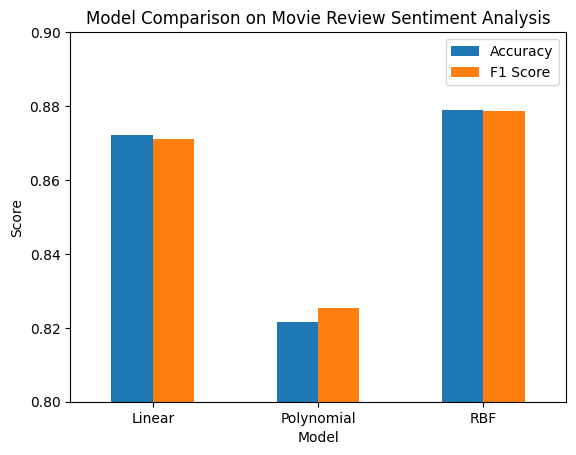

In [3]:
# Compare models performance
import pandas as pd
from sklearn.metrics import f1_score, accuracy_score
import matplotlib.pyplot as plt
comparison_df = pd.DataFrame({
    "Model": ["Linear", "Polynomial", "RBF"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_linear),
        accuracy_score(y_test, y_pred_poly),
        accuracy_score(y_test, y_pred_rbf)
    ],
    "F1 Score": [
        f1_score(y_test, y_pred_linear),
        f1_score(y_test, y_pred_poly),
        f1_score(y_test, y_pred_rbf)
    ]
})
print(comparison_df)

# visualize comparison
comparison_df.set_index("Model").plot.bar(rot=0)
plt.title("Model Comparison on Movie Review Sentiment Analysis")
plt.ylabel("Score")
plt.ylim(0.8, 0.9)
plt.show()


In [4]:
# Compare predictions from all three models on a sample review
def compare_models(review):
    X = tfidf.transform([review])
    return {
        "Linear": "Positive" if svm_linear.predict(X)[0] == 1 else "Negative",
        "Polynomial": "Positive" if svm_poly.predict(X)[0] == 1 else "Negative",
        "RBF": "Positive" if svm_rbf.predict(X)[0] == 1 else "Negative"
    }
print(compare_models("Visually impressive film with great music, although the plot failed to engage me."))

{'Linear': 'Negative', 'Polynomial': 'Positive', 'RBF': 'Positive'}


In [5]:
# Function to predict new input reviews sentiment with confidence score

def predict_sentiment_with_score(review_text):
    review_tfidf = tfidf.transform([review_text])
    score = svm_rbf.decision_function(review_tfidf)[0]
    label = "Positive 😊" if score > 0 else "Negative 😞"
    return label, score

review = input("Enter a movie review: ")
label, score = predict_sentiment_with_score(review)
print("Review:", review)
print("Sentiment:", label)
print("Confidence Score:", score)



Review: The story was weak, yet somehow I enjoyed the movie overall.
Sentiment: Positive 😊
Confidence Score: 0.5140489325111071
